In [1]:
pip install numpy pandas matplotlib seaborn plotly scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Eksplorasi Data

In [3]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Contoh menggunakan dataset digits
digits = load_digits()
data = pd.DataFrame(digits.data)
print(data.head())
print(data.shape)

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
(1797, 64)


# Reduksi Dimensi dengan PCA

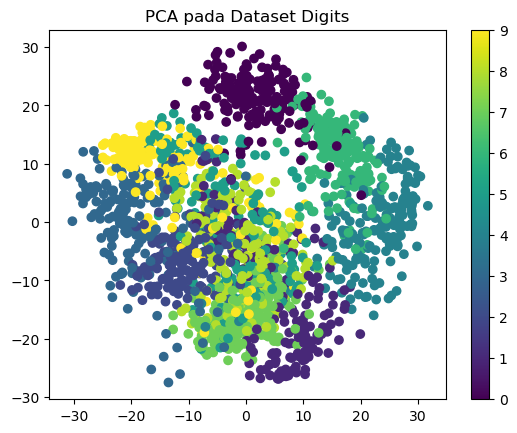

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)  # Reduksi ke 2 dimensi
reduced_data = pca.fit_transform(digits.data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=digits.target, cmap='viridis')
plt.title("PCA pada Dataset Digits")
plt.colorbar()
plt.show()

# Visualisasi dengan t-SNE

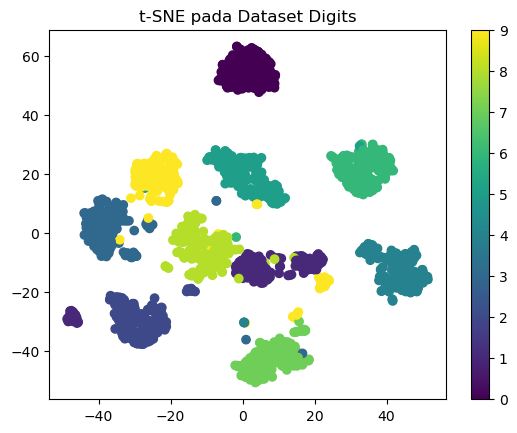

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(digits.data)

plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=digits.target, cmap='viridis')
plt.title("t-SNE pada Dataset Digits")
plt.colorbar()
plt.show()

# Visualisasi Interaktif dengan Plotly

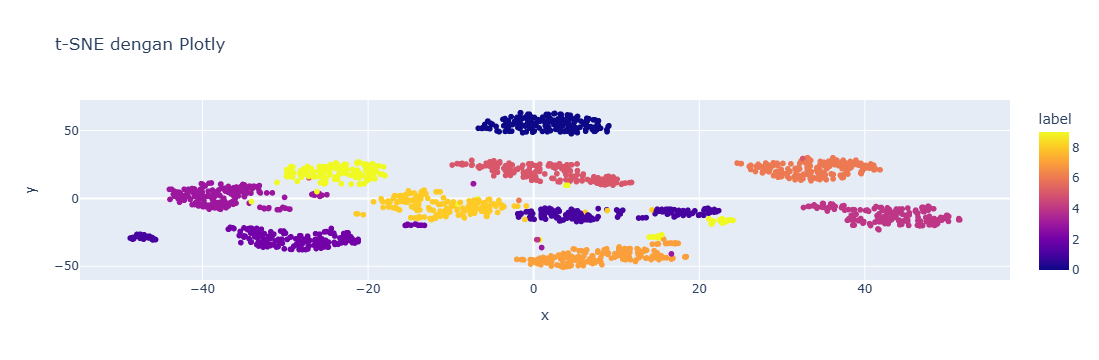

In [9]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame(reduced_data_tsne, columns=['x', 'y'])
df['label'] = digits.target

fig = px.scatter(df, x='x', y='y', color='label', title="t-SNE dengan Plotly")
fig.show()

# Data Set lain

## Reduksi Dimensi dengan PCA

In [12]:
# Membaca dataset CSV
data = pd.read_csv("C:/Users/EMALIA PUTRI/Semester 6/Data Science/week 4/fashion-mnist_test.csv")
print(data.head())
print(data.shape)


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

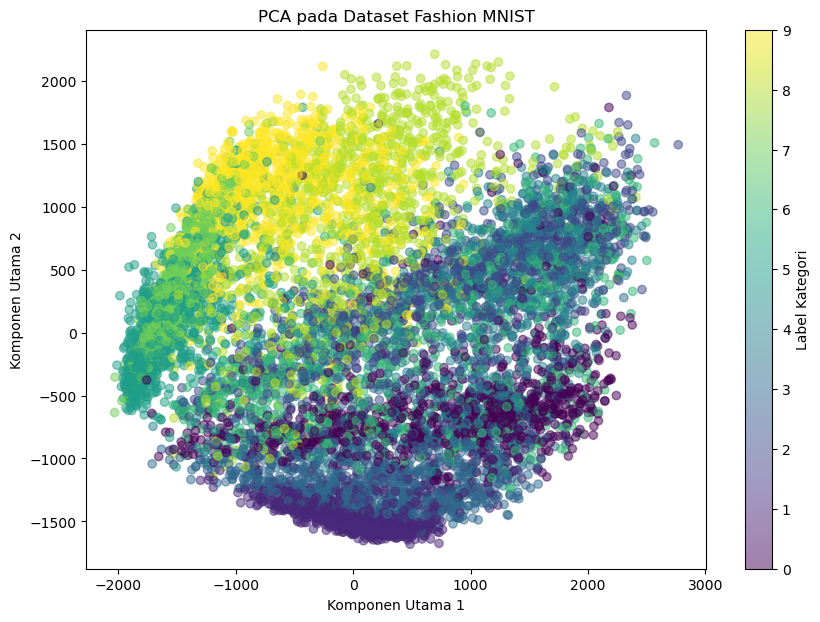

In [23]:
# Memisahkan fitur dan target
X = data.drop('label', axis=1)  # Menghapus kolom label
y = data['label']  # Kolom label

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)  # Reduksi ke 2 dimensi
reduced_data = pca.fit_transform(X)

# Visualisasi hasil PCA
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title("PCA pada Dataset Fashion MNIST")
plt.colorbar(ticks=range(10), label='Label Kategori')
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.show()

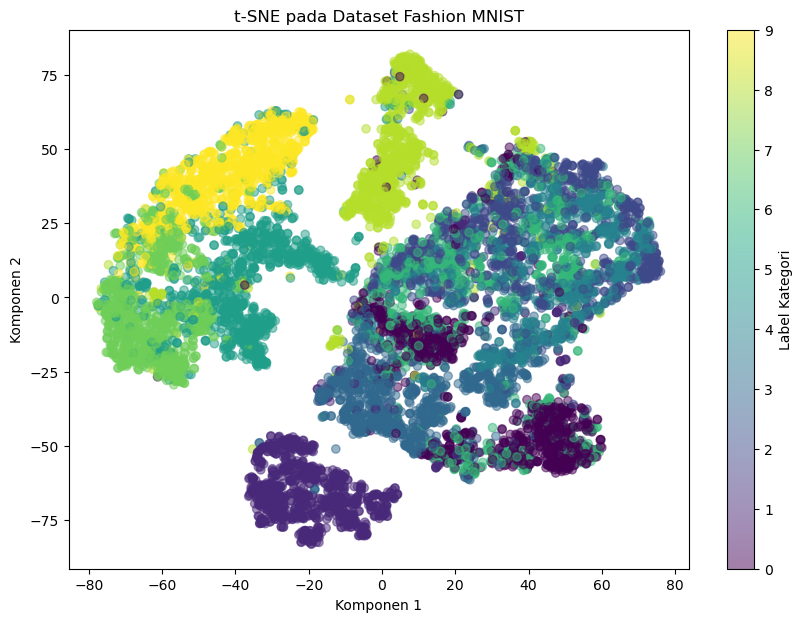

In [14]:
# Reduksi dimensi menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(X)

# Visualisasi hasil t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title("t-SNE pada Dataset Fashion MNIST")
plt.colorbar(ticks=range(10), label='Label Kategori')
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.show()

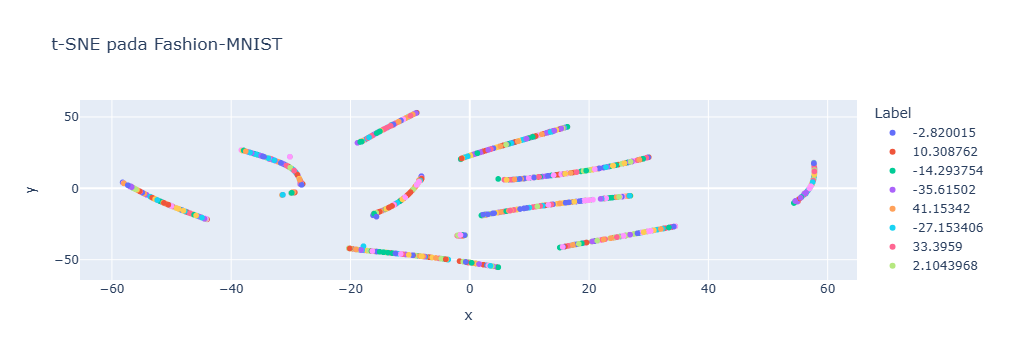

In [15]:
# Pisahkan fitur dan label
X = df.iloc[:, 1:].values  # Fitur
y = df.iloc[:, 0].values   # Label

# Normalisasi data
X_scaled = StandardScaler().fit_transform(X)

# Lakukan reduksi dimensi dengan t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(X_scaled)

# Buat DataFrame hasil reduksi
tsne_df = pd.DataFrame(reduced_data_tsne, columns=['x', 'y'])
tsne_df['label'] = y

# Visualisasi dengan Plotly
fig = px.scatter(tsne_df, x='x', y='y', color=tsne_df['label'].astype(str), 
                 title="t-SNE pada Fashion-MNIST", labels={'color': 'Label'})
fig.show()

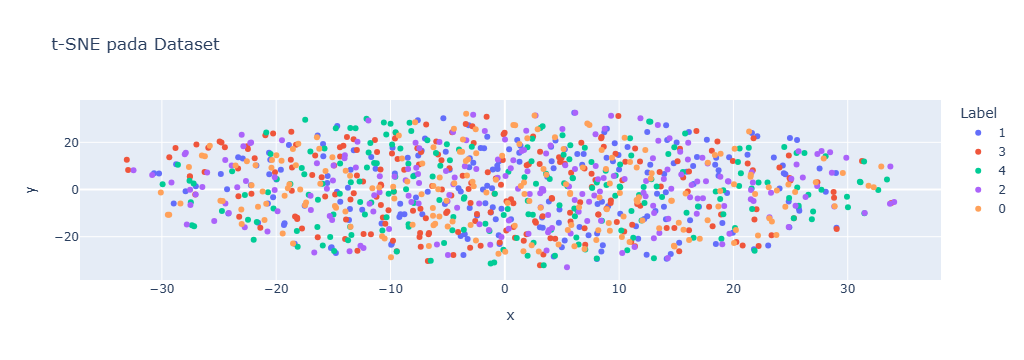

In [16]:
from sklearn.preprocessing import StandardScaler

# Contoh data
import numpy as np
np.random.seed(42)

data_size = 1000  # Jumlah sampel
num_features = 20  # Jumlah fitur
num_classes = 5  # Jumlah kelas

# Data acak sebagai pengganti dataset
X = np.random.rand(data_size, num_features)
y = np.random.randint(0, num_classes, data_size)

# Normalisasi data
X_scaled = StandardScaler().fit_transform(X)

# Reduksi dimensi dengan t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(X_scaled)

# Buat DataFrame hasil reduksi
tsne_df = pd.DataFrame(reduced_data_tsne, columns=['x', 'y'])
tsne_df['label'] = y

# Visualisasi dengan Plotly
fig = px.scatter(tsne_df, x='x', y='y', color=tsne_df['label'].astype(str), 
                 title="t-SNE pada Dataset", labels={'color': 'Label'})
fig.show()


In [17]:
!pip install umap-learn

In [18]:
import umap
import umap.umap_ as umap

D:\MATA KULIAH\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



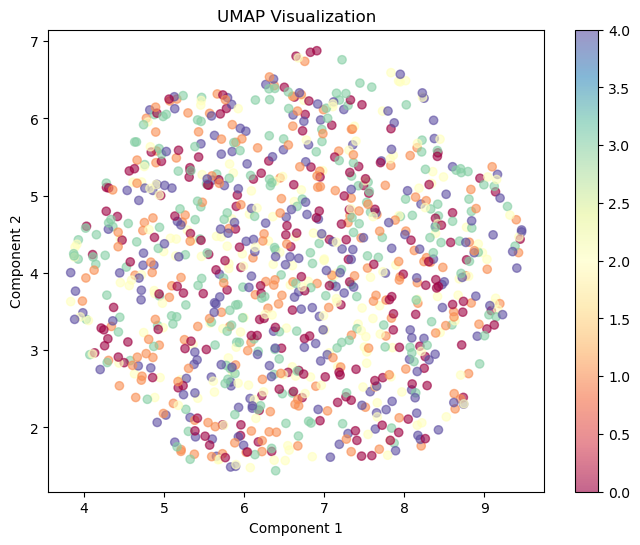

In [19]:
# Reduksi dimensi dengan UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Plot hasil reduksi dimensi UMAP
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap="Spectral", alpha=0.6)
plt.colorbar(scatter)
plt.title("UMAP Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [20]:
# Plotly visualization
df_vis = pd.DataFrame(reduced_data_tsne, columns=['x', 'y'])
df_vis['label'] = labels
fig = px.scatter(df_vis, x='x', y='y', color=df_vis['label'].astype(str), title='t-SNE dengan Plotly pada Fashion-MNIST')
fig.show()

NameError: name 'labels' is not defined